# Show time!!!

In [1]:
# import libraries
import sqlite3
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
#add connection to the database
conn = sqlite3.connect("movies_database.sqlite")
cur = conn.cursor()

In [3]:
#check tables which we have for work
for row in cur.execute("SELECT name FROM sqlite_master WHERE type='table';"):
    print(row)

('tmdb_movies',)
('imdb_title_crew',)
('tn_movie_budgets',)
('imdb_title_ratings',)
('imdb_name_basics',)
('imdb_title_principals',)
('imdb_title_akas',)
('bom_movie_gross',)
('imdb_title_basics',)
('rt_reviews',)
('rt_movie_info',)


In [10]:
cur.execute('''SELECT *
               FROM imdb_title_basics
               JOIN tmdb_movies
               ON imdb_title_basics.original_title = tmdb_movies.original_title
               ORDER BY popularity DESC
               ''')
df = pd.DataFrame(cur.fetchall()) 
df.columns = [i[0] for i in cur.description]
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
1,tt2911666,John Wick,John Wick,2014,101.0,"Action,Crime,Thriller",11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
2,tt4633694,Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse,2018,117.0,"Action,Adventure,Animation",23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
3,tt2310332,The Hobbit: The Battle of the Five Armies,The Hobbit: The Battle of the Five Armies,2014,144.0,"Adventure,Fantasy",11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
4,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673


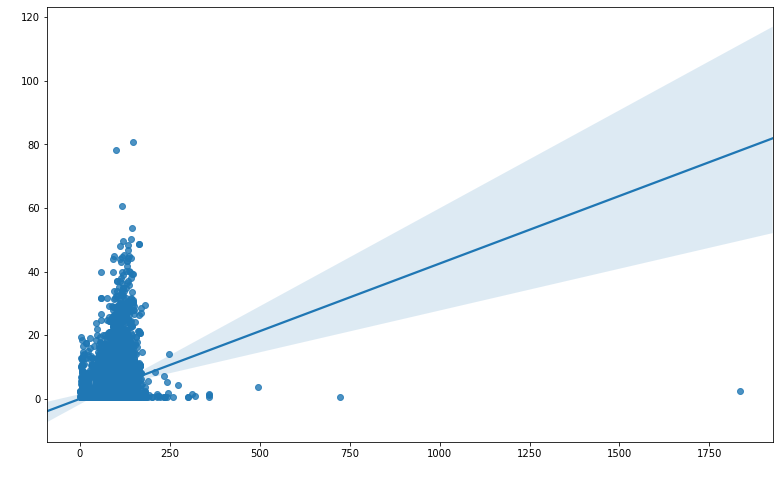

In [15]:
plt.figure(figsize=(13, 8))
sns.regplot(x='runtime_minutes', y='popularity', data=df)
plt.show()

How we can see - few movies are unusually long and have a low popularity. Let's create a dataframe without them.

In [28]:
cur.execute('''SELECT *
               FROM imdb_title_basics imdb
               JOIN tmdb_movies tmdb
               ON imdb.original_title = tmdb.original_title
               WHERE runtime_minutes < 250
               ORDER BY popularity DESC
               LIMIT 200
               ''')
runtime = pd.DataFrame(cur.fetchall()) 
runtime.columns = [i[0] for i in cur.description]
runtime.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
1,tt2911666,John Wick,John Wick,2014,101.0,"Action,Crime,Thriller",11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
2,tt4633694,Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse,2018,117.0,"Action,Adventure,Animation",23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
3,tt2310332,The Hobbit: The Battle of the Five Armies,The Hobbit: The Battle of the Five Armies,2014,144.0,"Adventure,Fantasy",11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
4,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673


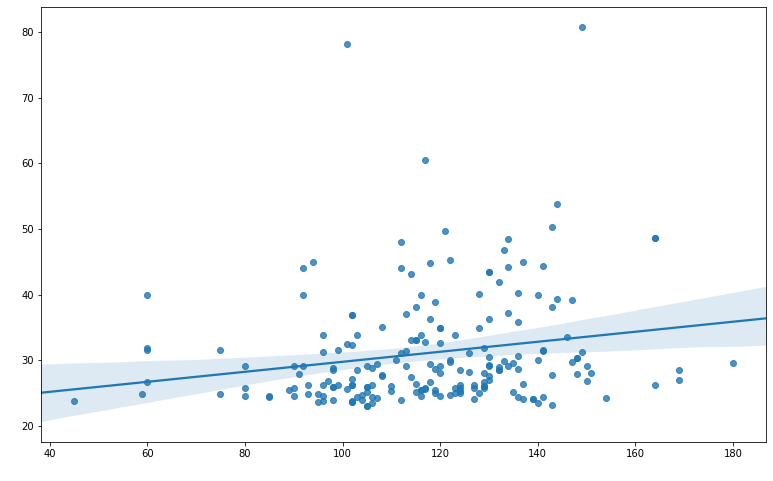

In [29]:
plt.figure(figsize=(13, 8))
sns.regplot(x='runtime_minutes', y='popularity', data=runtime)
plt.show()

In [17]:
decimals = pd.Series([5], index=['runtime_minutes'])
runtime.round(decimals)
runtime

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
1,tt2911666,John Wick,John Wick,2014,101.0,"Action,Crime,Thriller",11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
2,tt4633694,Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse,2018,117.0,"Action,Adventure,Animation",23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
3,tt2310332,The Hobbit: The Battle of the Five Armies,The Hobbit: The Battle of the Five Armies,2014,144.0,"Adventure,Fantasy",11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
4,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19435,tt9816184,Captive,Captive,2018,90.0,Drama,23783,[27],321768,en,Captive,0.600,2017-04-28,Captive,1.5,2
19436,tt9856484,The Hunt,The Hunt,2019,90.0,Crime,13400,[],393082,en,The Hunt,0.600,2014-10-04,The Hunt,8.0,1
19437,tt9866710,Obsession,Obsession,2017,58.0,Thriller,7510,"[10770, 18, 53]",101437,en,Obsession,0.600,2012-02-05,A Trusted Man,5.6,5
19438,tt9872052,Eight,Eight,2018,88.0,Thriller,17053,[18],346657,en,Eight,0.600,2015-03-28,Eight,5.4,4


In [30]:
runtime.describe()

,start_year,runtime_minutes,index,id,popularity,vote_average,vote_count
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,2015.475000,117.425000,17020.02000,261885.460000,31.078375,6.930000,6765.555000
std,2.447309,22.119919,7164.40242,141130.756473,8.591379,0.760058,4462.041226
min,2010.000000,45.000000,0.00000,1771.000000,22.995000,4.700000,225.000000
25%,2014.000000,102.000000,11038.75000,150540.000000,25.567250,6.375000,3166.500000
50%,2016.000000,118.000000,20619.50000,284053.000000,28.539000,7.000000,6206.000000
75%,2018.000000,132.000000,23829.25000,375588.000000,33.191750,7.500000,10309.000000
max,2018.000000,180.000000,23875.00000,504172.000000,80.773000,8.400000,22186.000000


In [49]:
min_value = runtime['runtime_minutes'].min()
first_quantile = runtime['runtime_minutes'].describe()[4]
third_quantile = runtime['runtime_minutes'].describe()[6]
second_quantile = runtime['runtime_minutes'].describe()[5]
max_value = runtime['runtime_minutes'].max()

print(first_quantile,min_value)

102.0 45.0


In [51]:
runtime[(runtime['runtime_minutes']>= 45)&(runtime['runtime_minutes']<102)].count()

tconst                    42
primary_title             42
original_title            42
start_year                42
runtime_minutes           42
genres                    42
index                     42
genre_ids                 42
id                        42
original_language         42
original_title            42
popularity                42
release_date              42
title                     42
vote_average              42
vote_count                42
runtime_minutes_levels    42
dtype: int64

In [48]:
print(first_quantile,second_quantile)

102.0 118.0


In [52]:
runtime[(runtime['runtime_minutes']>= 102)&(runtime['runtime_minutes']<118)].count()

tconst                    56
primary_title             56
original_title            56
start_year                56
runtime_minutes           56
genres                    56
index                     56
genre_ids                 56
id                        56
original_language         56
original_title            56
popularity                56
release_date              56
title                     56
vote_average              56
vote_count                56
runtime_minutes_levels    56
dtype: int64

In [47]:
print(second_quantile,third_quantile)

118.0 132.0


In [53]:
runtime[(runtime['runtime_minutes']>= 118)&(runtime['runtime_minutes']<132)].count()

tconst                    49
primary_title             49
original_title            49
start_year                49
runtime_minutes           49
genres                    49
index                     49
genre_ids                 49
id                        49
original_language         49
original_title            49
popularity                49
release_date              49
title                     49
vote_average              49
vote_count                49
runtime_minutes_levels    49
dtype: int64

In [42]:
print(third_quantile,max_value)

132.0 180.0


In [54]:
runtime[(runtime['runtime_minutes']>= 132)&(runtime['runtime_minutes']<=180)].count()

tconst                    53
primary_title             53
original_title            53
start_year                53
runtime_minutes           53
genres                    53
index                     53
genre_ids                 53
id                        53
original_language         53
original_title            53
popularity                53
release_date              53
title                     53
vote_average              53
vote_count                53
runtime_minutes_levels    53
dtype: int64

In [55]:
np.corrcoef(runtime['runtime_minutes'], runtime['popularity'])

array([[1.        , 0.19644665],
       [0.19644665, 1.        ]])

## The correlation coefficient tells us that the time of the film does not affect its popularity. Let's try to find out which characteristic depend on the runtime.

In [62]:
cur.execute('''SELECT tmdb.*, runtime_minutes,production_budget, domestic_gross, worldwide_gross 
               FROM tmdb_movies tmdb
               JOIN imdb_title_basics imdb
               ON imdb.original_title = tmdb.original_title
               JOIN 
               (SELECT movie, 
                CAST(REPLACE(SUBSTR(production_budget,2),',','')as INTEGER) as production_budget, 
                CAST(REPLACE(SUBSTR(domestic_gross,2),',','')as INTEGER) as domestic_gross, 
                CAST(REPLACE(SUBSTR(worldwide_gross,2),',','')as INTEGER) as worldwide_gross 
                FROM tn_movie_budgets) tn
               ON tn.movie = tmdb.original_title 
               ORDER BY popularity DESC
               LIMIT 200
            ''')
top_movies = pd.DataFrame(cur.fetchall())
top_movies.columns = [i[0] for i in cur.description]
top_movies

,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,runtime_minutes,production_budget,domestic_gross,worldwide_gross
0,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,149.0,300000000,678815482,2048134200
1,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081,101.0,30000000,43037835,76235001
2,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392,144.0,250000000,255119788,945577621
3,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673,143.0,225000000,623279547,1517935897
4,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673,143.0,60000000,23385416,48585416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,20642,"[28, 878, 53, 12]",335988,en,Transformers: The Last Knight,24.258,2017-06-21,Transformers: The Last Knight,6.0,3255,154.0,217000000,130168683,602893340
196,23869,"[28, 12, 878, 14]",427641,en,Rampage,24.238,2018-04-13,Rampage,6.2,3176,107.0,120000000,101028233,428056280
197,17396,"[18, 36, 10752]",324786,en,Hacksaw Ridge,24.074,2016-11-04,Hacksaw Ridge,8.1,6608,139.0,40000000,67209615,168904682
198,20643,"[18, 36, 10752]",324786,en,Hacksaw Ridge,24.074,2016-11-04,Hacksaw Ridge,8.1,6608,139.0,40000000,67209615,168904682


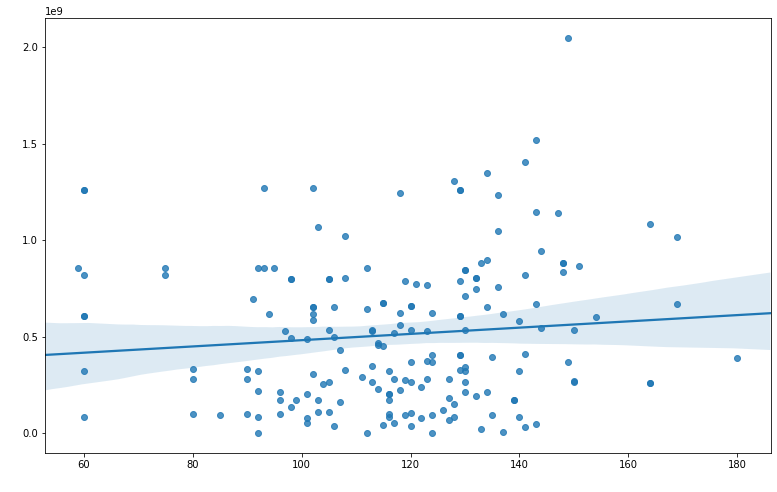

In [63]:
plt.figure(figsize=(13, 8))
sns.regplot(x='runtime_minutes', y='worldwide_gross', data=top_movies)
plt.show()

In [64]:
np.corrcoef(runtime['runtime_minutes'], runtime['popularity'])

array([[1.        , 0.19644665],
       [0.19644665, 1.        ]])